In [375]:
# Import packages and datasets
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [376]:
file = np.load("imageData.npz", allow_pickle=True)
file.files

['arr_0', 'arr_1']

In [377]:
img, target = file['arr_0'], file['arr_1']
img = img.reshape(2861, 30000)
print(img.shape)
sum(target == 'mask_cor'), sum(target == 'mask_uncor'), sum(target == 'no_mask')

(2861, 30000)


(933, 928, 1000)

In [378]:
data_train, data_test, target_train, target_test = train_test_split(img, target, test_size=0.3, shuffle=True)
sum(target_train == 'mask_cor'), sum(target_train == 'mask_uncor'), sum(target_train == 'no_mask')

(642, 652, 708)

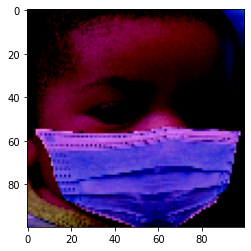

In [379]:
img_test = img[0].reshape(100, 100, 3) * 255
img_test = img_test.astype(int)
plt.imshow(img_test)

In [380]:
svm = SVC()
svm.fit(data_train, target_train)
acc = svm.score(data_test, target_test) * 100
acc

KeyboardInterrupt: 

In [ ]:
me = cv2.imread("me_cor.jpg")
me = cv2.cvtColor(me, cv2.COLOR_BGR2RGB)
plt.imshow(me)
grey = cv2.cvtColor(me, cv2.COLOR_RGB2GRAY)
faceclassifier = cv2.CascadeClassifier("/Users/muuu/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/cv2/data/haarcascade_frontalface_default.xml")
color = (0, 255, 0)
faceRects = faceclassifier.detectMultiScale(grey, scaleFactor=1.2, minNeighbors=3, minSize=(32, 32))
if len(faceRects):
    for faceRects in faceRects:
        x, y, w, h = faceRects
        cv2.rectangle(me, (x, y), (x + h, y + w), color, 1)
        cropped = img[y:y+w, x:x+h]
cv2.imshow("image",cropped)